# Analysis of Mexican Earthquakes

In this notebook we will explore a database of Mexican earthquakes from 1900 until today.

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [3]:
palette = sns.color_palette("PRGn")
sns.set_palette(palette)

## Let's take a look at the data set

The data we have is from the Servicio Sismológico Nacional and comprises of all earthquakes occurred in Mexico from 1900 until March 2023. 

México. Universidad Nacional Autónoma de México, I. d. G., Servicio Sismológico Nacional. (2023). Catálogo de sismos. Extraído de http://www2.ssn.unam.mx:8080/catalogo/

### We load our data into a Pandas dataframe

In [4]:
types_dict = {'Fecha':str, 'Hora':str, 'Magnitud':float, 'Latitud':float, 'Longitud':float, 
              'Profundidad':float,'Referencia de localizacion':str, 'Fecha UTC':str, 
              'Hora UTC':str, 'Estatus':str}
date=['Fecha']
df_mexearthquake = pd.read_csv('SSNMX_catalogo.csv', dtype=types_dict, parse_dates=date)
df_mexearthquake.head(3)

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
0,1900-01-20,00:33:30,7.4,20.0,-105.0,33.0,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",1900-01-20,06:33:30,revisado
1,1900-05-16,14:12:00,6.9,20.0,-105.0,33.0,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",1900-05-16,20:12:00,revisado
2,1901-03-05,04:45:00,6.9,25.0,-110.0,33.0,"100 km al NORESTE de LA PAZ, BCS",1901-03-05,10:45:00,revisado


We change the Date column type to datetime

In [5]:
df_mexearthquake['Fecha']= pd.to_datetime(df_mexearthquake['Fecha'])
df_mexearthquake.dtypes

Fecha                         datetime64[ns]
Hora                                  object
Magnitud                             float64
Latitud                              float64
Longitud                             float64
Profundidad                          float64
Referencia de localizacion            object
Fecha UTC                             object
Hora UTC                              object
Estatus                               object
dtype: object

## Now, let's explore the whole dataset 

### What is the min, max or mean value for the magnitudes?

In [6]:
df_mexearthquake.Magnitud.describe()

count    251732.000000
mean          3.673150
std           0.363148
min           3.000000
25%           3.400000
50%           3.600000
75%           3.900000
max           8.200000
Name: Magnitud, dtype: float64

We can observe the magnitude's mean value is 3.6, with the majority of earthquakes (75%) is weaker than 3.9. With this in mind, let's take a look at a boxplot.

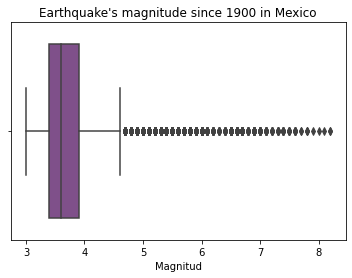

In [7]:
sns.boxplot( x=df_mexearthquake.Magnitud )
plt.title('Earthquake\'s magnitude since 1900 in Mexico')
plt.show()

We visualise what we were discussing before and observe how most earthquakes stronger than 5.0 are outliers. 


### Earthquakes' magnitudes vs Date

Here we are going to plot the different magnitudes for all the recorded earthquakes with mag > 5.0. We are restricting the earthquake's magnitude to keep the plot readable. 

In [8]:
mag5indices= np.where(df_mexearthquake['Magnitud']>=5)  
df_mag5 = df_mexearthquake.loc[mag5indices] #dataframe with magnitude > 5.0



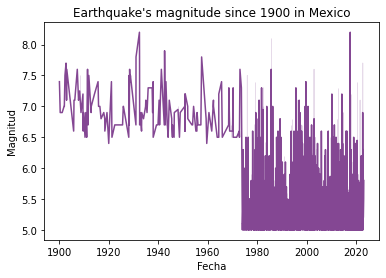

In [10]:
sns.lineplot(x="Fecha", y="Magnitud", data=df_mag5)
plt.title('Earthquake\'s magnitude since 1900 in Mexico')
plt.show()

From the plot we can see infer there was an important expansion of the Mexican earthquake detection network some time in the 1970's, since before that time there were no earthquakes weaker than 6.5 detected.

### What is the distribution of magnitude?

From the plot above we can guess how the distribution would look like, but let's plot it and confirm

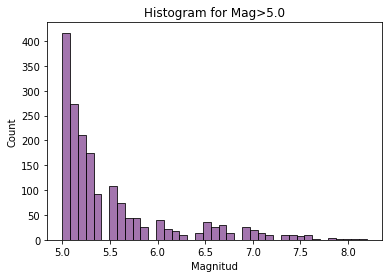

In [11]:
sns.histplot(x ='Magnitud', data = df_mag5)
plt.title('Histogram for Mag>5.0')
plt.show()


We observe a positively skewed distribution. This may be due to our cutoff for the magnitude (>5.0)
Let's now see distribution for the whole set of earthquakes and see if this is true

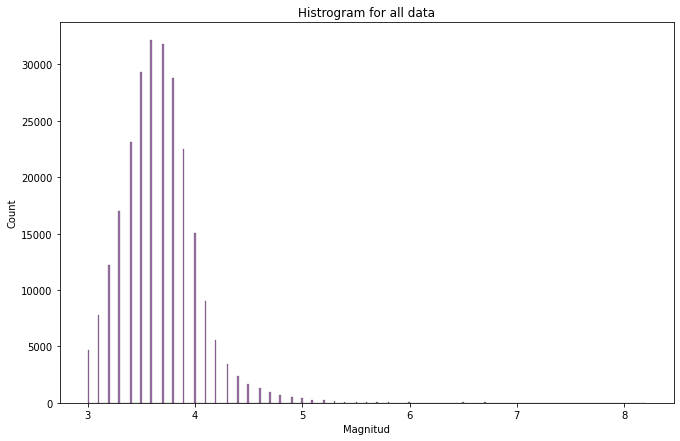

In [12]:
plt.figure(figsize=(11,7)) 
sns.histplot(x ='Magnitud', data = df_mexearthquake)
plt.title('Histrogram for all data')
plt.show()

We can see this plot looks closer to a normal distribution, centrered around a magnitude of 3.5. 
The reason we observe this behaviour is because stronger earthquakes of magnitude bigger than 6.0 are relatively rare (as we saw in the box plot).

###  Frequency of Earthquakes by month

Just for fun, let's see if there's a month with more earthquakes

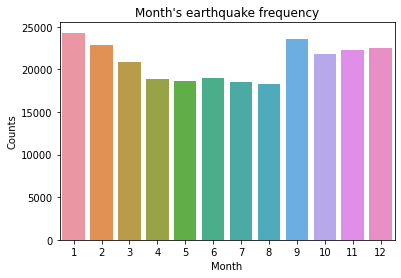

In [20]:
df_mexearthquake['Month'] = df_mexearthquake.Fecha.dt.month #create a column with the month
x = df_mexearthquake.groupby(['Month']).Magnitud.count().reset_index(name='Counts') #group by Month and compute the count for Magnitude
sns.barplot(x = 'Month', y='Counts', data = x)
plt.title('Month\'s earthquake frequency')
plt.show()

As we expected, most months have the same frequency of earthquakes

#### There is a belief that stronger earthquakes occur in September, given that some of strongest earthquakes in the last 35 years have been in that month

In [21]:
df_mag5.loc[(df_mag5.Fecha.dt.year > 1978) & (df_mag5.Magnitud>7.5)]

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
2135,1985-09-19,07:17:49,8.1,18.419,-102.468,15.0,"45 km al NOROESTE de LA MIRA, MICH",1985-09-19,13:17:49,revisado
2156,1985-09-20,19:37:14,7.6,17.828,-101.681,17.0,"25 km al NOROESTE de ZIHUATANEJO, GRO",1985-09-21,01:37:14,revisado
8563,1995-10-09,09:35:54,8.0,18.993,-104.245,25.0,"10 km al SURESTE de MANZANILLO, COL",1995-10-09,15:35:54,revisado
16761,2003-01-21,20:06:34,7.6,18.600,-104.220,9.0,"46 km al SUROESTE de CD DE ARMERIA, COL",2003-01-22,02:06:34,revisado
89576,2017-09-07,23:49:17,8.2,14.761,-94.103,45.9,"140 km al SUROESTE de PIJIJIAPAN, CHIS",2017-09-08,04:49:17,revisado
236689,2022-09-19,13:05:09,7.7,18.220,-103.290,15.0,"63 km al SUR de COALCOMAN, MICH",2022-09-19,18:05:09,verificado


Here we observe that at least four of the six strongest earthquakes have occurred in September. Let's plot the mean magnitude for each month to check if this is an overall trend. 

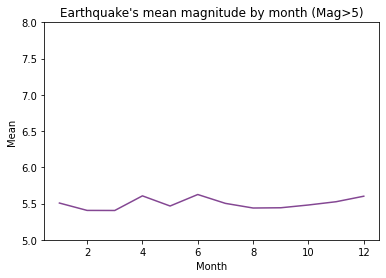

In [25]:
df_mag5['Month'] = df_mag5.Fecha.dt.month #create a column for Month
x = df_mag5.groupby(['Month']).Magnitud.mean().reset_index(name='Mean') #group by month and compute its mean magnitude
sns.lineplot(x=x['Month'], y=x['Mean'])
plt.title('Earthquake\'s mean magnitude by month (Mag>5)')
plt.ylim(5,8)
plt.show()


We observe that the mean value for the magnitude stays approximately the same for any month

### Let's build a box plot but now for another important parameter: Depth

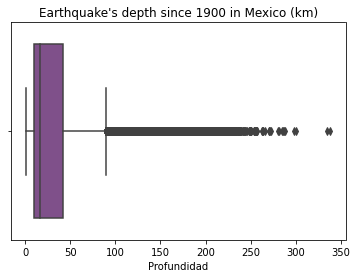

In [191]:
sns.boxplot( x=df_mexearthquake.Profundidad )
plt.title('Earthquake\'s depth since 1900 in Mexico (km)')
plt.show()

We see most earthquakes have a depth less than 50 km. Now, let's plot the depth for earthquakes with a magnitude > 5.0

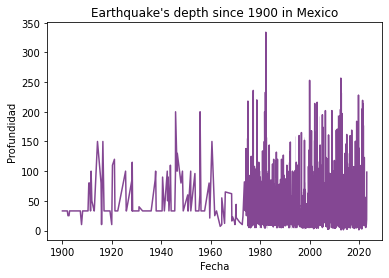

In [192]:
sns.lineplot(x="Fecha", y="Profundidad", data=df_mag5)
#plt.xticks(rotation=15)
plt.title('Earthquake\'s depth since 1900 in Mexico')
plt.show()

As with the case for the magnitude, there was an increase on depth detection during the 1970s. 

### What is the relationship between Depth and Magnitude?

Let's plot both variables and see it for ourselves

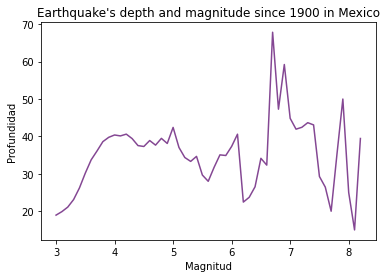

In [26]:
sns.lineplot(x="Magnitud", y="Profundidad", data=df_mexearthquake, ci=None)
plt.title('Earthquake\'s depth and magnitude since 1900 in Mexico')
plt.show()

Let's see the same plot but for earthquakes with a magnitude stronger than 5.0

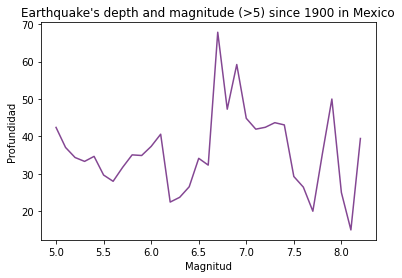

In [28]:
sns.lineplot(x="Magnitud", y="Profundidad", data=df_mag5, ci=None)
plt.title('Earthquake\'s depth and magnitude (>5) since 1900 in Mexico')
plt.show()

From what we observe, earthquakes stronger tend to be shallower, but there isn't a clear trend. We can use a Pearson correlation test to confirm that there isn't a correlation

In [111]:
pearcorr=scipy.stats.pearsonr(df_mag5.Magnitud, df_mag5.Profundidad)
pearcorr

(0.01494699396456869, 0.528211734102329)